# The Newton-Raphson Method

---

## 1. Introduction and Geometric Intuition

The **Newton-Raphson Method**, or simply **Newton's Method**, is one of the most powerful and well-known numerical methods for finding the root of a function. Unlike bracketing methods, it doesn't require an interval that contains the root. Instead, it starts with a single initial guess, $x_0$, and iteratively improves it.

The core idea is geometric: at each step, we approximate the function with its **tangent line** at the current guess. The next guess for the root is then the point where this tangent line intersects the x-axis.

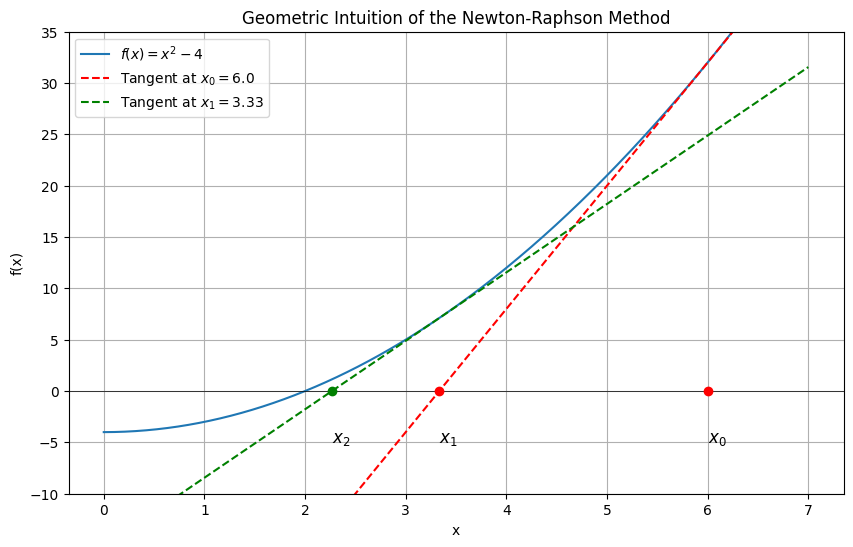

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 4

def df(x):
    return 2*x

x0 = 6.0
x_vals = np.linspace(0, 7, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - 4$')
plt.axhline(0, color='black', lw=0.5)

# First iteration
y0 = f(x0)
tangent_1 = df(x0) * (x_vals - x0) + y0
x1 = x0 - f(x0)/df(x0)
plt.plot(x_vals, tangent_1, 'r--', label=f'Tangent at $x_0={x0}$')
plt.scatter([x0, x1], [0, 0], color='red', zorder=5)
plt.text(x0, -5, f'$x_0$', fontsize=12)
plt.text(x1, -5, f'$x_1$', fontsize=12)

# Second iteration
y1 = f(x1)
tangent_2 = df(x1) * (x_vals - x1) + y1
x2 = x1 - f(x1)/df(x1)
plt.plot(x_vals, tangent_2, 'g--', label=f'Tangent at $x_1={x1:.2f}$')
plt.scatter(x2, 0, color='green', zorder=5)
plt.text(x2, -5, f'$x_2$', fontsize=12)

plt.title('Geometric Intuition of the Newton-Raphson Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-10, 35)
plt.show()

## 2. Derivation of the Formula

We can derive the method's formula from the equation of a tangent line. The tangent line to the function $f(x)$ at a point $x_k$ is given by:
$$ y - f(x_k) = f'(x_k) (x - x_k) $$

We want to find where this line crosses the x-axis, so we set $y=0$ and solve for $x$, which will be our next approximation, $x_{k+1}$:
$$ 0 - f(x_k) = f'(x_k) (x_{k+1} - x_k) $$
$$ -f(x_k) = f'(x_k)x_{k+1} - f'(x_k)x_k $$
$$ f'(x_k)x_{k+1} = f'(x_k)x_k - f(x_k) $$

Assuming $f'(x_k) \neq 0$, we can divide by it to get the famous **Newton-Raphson formula**:
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

## 3. Connection to Fixed-Point Iteration and Convergence

Newton's method is actually a special, powerful case of the Fixed-Point Iteration method.

If we define our iteration function $g(x)$ as:
$$ g(x) = x - \frac{f(x)}{f'(x)} $$

Then the Newton-Raphson formula $x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$ is equivalent to the fixed-point formula $x_{k+1} = g(x_k)$.

#### Are convergence checks still necessary?

**Yes** let's analyze the convergence condition for this specific $g(x)$. The Fixed-Point Theorem states that we need $|g'(x)| < 1$ for convergence. Let's find the derivative of our $g(x)$ using the quotient rule:

$$
g'(x) = \frac{d}{dx} \left( x - \frac{f(x)}{f'(x)} \right) = 1 - \frac{f'(x)f'(x) - f(x)f''(x)}{[f'(x)]^2} = 1 - \frac{[f'(x)]^2}{[f'(x)]^2} + \frac{f(x)f''(x)}{[f'(x)]^2}
$$

$$ g'(x) = \frac{f(x)f''(x)}{[f'(x)]^2} $$

Now consider the value of this derivative at the actual root, $r$. Since $f(r) = 0$, we have:
$$ g'(r) = \frac{f(r)f''(r)}{[f'(r)]^2} = \frac{0 \cdot f''(r)}{[f'(r)]^2} = 0 $$

This is a remarkable result. Since $g'(r) = 0$, which is much less than 1, the convergence is extremely fast (it is **quadratic convergence**), meaning the number of correct decimal places roughly doubles with each iteration.

**However, this is only true if we are *already close* to the root.** If our initial guess $x_0$ is far from the root, or if we encounter a point where $f'(x_k) \approx 0$, the method can fail spectacularly. In such cases, we end up dividing by an extremely small number, which causes a large update step in the iteration. This can push the next approximation $x_(k+1)$ far away from the actual root, leading to divergence, oscillation, or even numerical overflow.

Therefore, while Newton’s Method offers exceptional speed near the solution, its reliability still depends heavily on a good initial guess and the behavior of $f'(x)' in the region of interest.

## 4. The Algorithm

1.  **Input**: The function $f(x)$, its derivative $f'(x)$, an initial guess $x_0$, a tolerance $\epsilon$, and a maximum number of iterations `max_iter`.
2.  **Initialize**: Set a counter $k = 1$.
3.  **Loop**: While $k \le$ `max_iter`:

    a. Check if $f'(x_{k-1})$ is close to zero. If so, the method may fail; stop and report an error.

    b. Calculate the next approximation: $x_k = x_{k-1} - \frac{f(x_{k-1})}{f'(x_{k-1})}$.

    c. Check the stopping criterion (e.g., if $|x_k - x_{k-1}| < \epsilon$). If met, stop.

    d. Increment the counter: $k = k + 1$.

4.  **Output**: Return the final approximation $x_k$.

## 5. Python Implementation and Example

In [ ]:
import pandas as pd

def newton_raphson(f, df, x0, tol=1e-6, max_iter=50):
    """
    Finds a root using the Newton-Raphson method.
    
    Returns:
        The approximate root and a DataFrame of the iteration history.
    """
    k = 0
    xk = x0
    history = []
    
    while k < max_iter:
        fxk = f(xk)
        dfxk = df(xk)
        
        # Check for potential division by zero
        if abs(dfxk) < 1e-12:
            print("Error: Derivative is close to zero. Newton's method fails.")
            return None, pd.DataFrame(history, columns=['k', 'x_k', 'f(x_k)', 'Error'])
        
        xk_next = xk - fxk / dfxk
        error = abs(xk_next - xk)
        history.append([k, xk, fxk, error])
        
        if error < tol:
            break
            
        xk = xk_next
        k += 1
        
    df = pd.DataFrame(history, columns=['k', 'x_k', 'f(x_k)', 'Error |x_{k+1}-x_k|'])
    df.set_index('k', inplace=True)
    return xk_next, df

# --- Example: f(x) = x^3 - 9x + 3 ---
def f_ex(x):
    return x**3 - 9*x + 3

def df_ex(x):
    return 3*x**2 - 9

# Find the root in the interval [0, 1] with an initial guess
initial_guess = 0.5
tolerance = 1e-8

root_approx, history_df = newton_raphson(f_ex, df_ex, initial_guess, tol=tolerance)

print(f"--- Newton-Raphson for f(x) = x^3 - 9x + 3 with x0 = {initial_guess} ---")
display(history_df)
if root_approx is not None:
    print(f"\nRoot approximation: {root_approx:.8f}")

Notice the incredibly fast convergence. The error shrinks quadratically, reaching the desired tolerance in just a few iterations.

## 6. Failure Cases for Newton's Method

Despite its speed, Newton's method is not foolproof. Here are common scenarios where it can fail:

1.  **Horizontal Tangent ($f'(x_k) = 0$)**: If the derivative at a guess is zero, the tangent line is horizontal and will never intersect the x-axis. Our formula involves division by $f'(x_k)$, leading to a division-by-zero error.
2.  **Oscillation**: The sequence of guesses can enter an infinite cycle, bouncing between two or more values without converging. This often happens with functions that have certain symmetries.
3.  **Divergence**: If the initial guess is too far from the root, the tangent lines can actually send the subsequent guesses further and further away.

In [ ]:
# Example of Failure Case: Oscillation
# f(x) = x^3 - 2x + 2

def f_fail(x):
    return x**3 - 2*x + 2

def df_fail(x):
    return 3*x**2 - 2

print("--- Failure Case: Oscillation with x0 = 0 ---")
root_fail, history_fail_df = newton_raphson(f_fail, df_fail, x0=0, max_iter=10)
display(history_fail_df)
print("\nThe method bounces between 0 and 1 indefinitely.")

## 7. Advantages and Disadvantages

#### Advantages:
1.  **Extremely Fast Convergence**: When it works, it converges quadratically, which is much faster than the linear convergence of Bisection or Fixed-Point Iteration.

#### Disadvantages:
1.  **Not Guaranteed to Converge**: It can fail spectacularly if the initial guess is poor or if the function has problematic characteristics (e.g., a derivative near zero).
2.  **Requires the Derivative**: You must be able to compute the analytical derivative $f'(x)$, which may not always be easy or possible.
3.  **Can be Sensitive to Initial Guess**: A good starting point is often crucial for convergence.